In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
train_df = pd.read_csv('uid_train.txt',sep='\t',header=None)
train_df.columns = ['uid','label']

train_sms = pd.read_csv('sms_train.txt',sep='\t',header=None)
train_sms.columns = ['uid','opp_num','opp_head','opp_len','start_time','in_out']

train_voice = pd.read_csv('voice_train.txt',sep='\t',header=None)
train_voice.columns = ['uid','opp_num','opp_head','opp_len','start_time','end_time','call_type','in_out']

train_wa = pd.read_csv('wa_train.txt',sep='\t',header=None)
train_wa.columns = ['uid','wa_name','visit_cnt','visit_dura','up_flow','down_flow','wa_type','date']

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
train_df.isnull().sum()

uid      0
label    0
dtype: int64

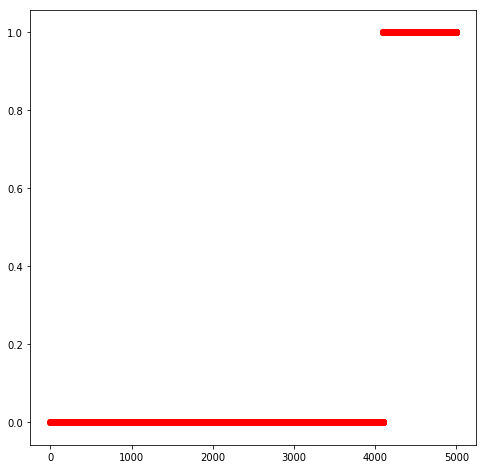

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(range(train_df.shape[0]),train_df['label'].values,color='red')

In [18]:
train_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302976 entries, 0 to 302975
Data columns (total 6 columns):
uid           302976 non-null object
opp_num       302976 non-null object
opp_head      302976 non-null int64
opp_len       302976 non-null int64
start_time    302976 non-null int64
in_out        302976 non-null int64
dtypes: int64(4), object(2)
memory usage: 13.9+ MB


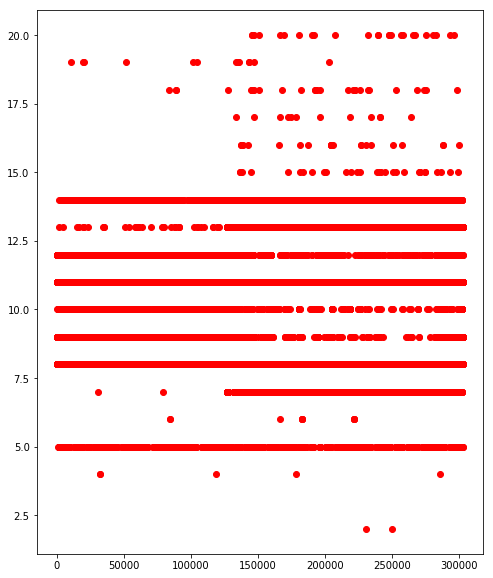

In [20]:
plt.figure(figsize=(8,10))
plt.scatter(range(train_sms.shape[0]),train_sms['opp_len'].values,color='red')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

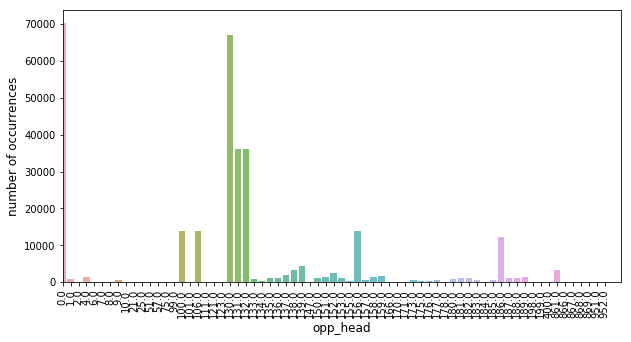

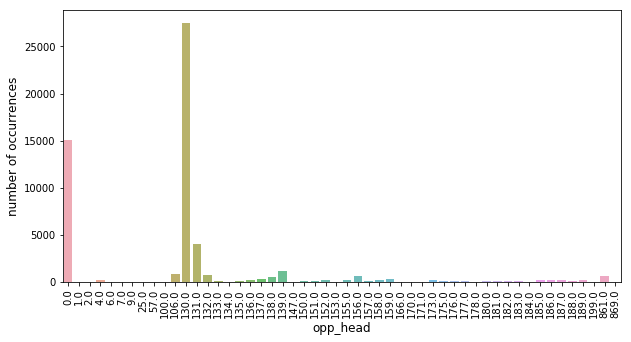

In [25]:
sms = train_df.merge(train_sms,on='uid',how='left').reset_index(drop=True)
test = pd.read_csv('sms_test_b.txt',sep='\t',header=None)
test.columns = ['uid','opp_num','opp_head','opp_len','start_time','in_out']
sms1 = sms[sms['label']==1]
bath = sms['opp_head'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("opp_head",fontsize=12)
plt.xticks(rotation=90)
plt.xlim(0,70)
bath = sms1['opp_head'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("opp_head",fontsize=12)
plt.xticks(rotation=90)
# plt.xlim(5,20)

# bath = test['opp_head'].value_counts()
# plt.figure(figsize=(10,5))
# sns.barplot(bath.index,bath.values,alpha=0.8)
# plt.ylabel("number of occurrences",fontsize = 12)
# plt.xlabel("opp_head",fontsize=12)
# plt.xticks(rotation=90)
# plt.xlim(5,20)
# plt.show()
# gp = sms.groupby(['uid','label'])['opp_head']
# gp.agg(pd.Series.mode).reset_index()
# print(gp.head())
# x = gp.apply(lambda x:x.count())
# x = x.unstack(fill_value=0).reset_index(drop=True)
# x.columns = ['0','1']
# sms['sms_opp_num_count_out'] = x['0']
# sms['sms_opp_num_count_in'] = x['1']
# train_sms['sms_opp_head'] = x.values
# sms.info()
# sms.head(3)
# sms_1.head()
# bath = sms['opp_head'].value_counts()
# plt.figure(figsize=(20,10))
# sns.barplot(bath.index,bath.values,alpha=0.8)
# plt.ylabel("number of occurrences",fontsize = 12)
# plt.xlabel("opp_head",fontsize=12)
# plt.figure(figsize=(12,6))
# sms.plot.scatter(sms["label"],sms["opp_head"],jitter=True,order=['0','1'])

Text(0.5,0,'opp_len')

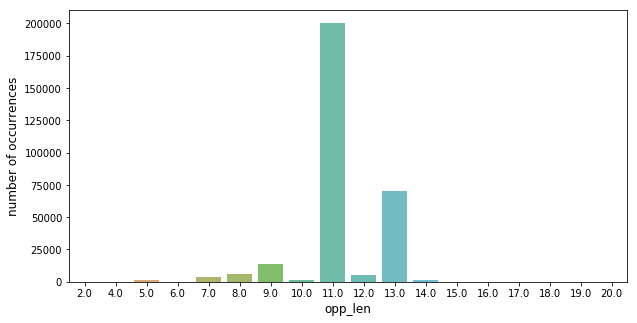

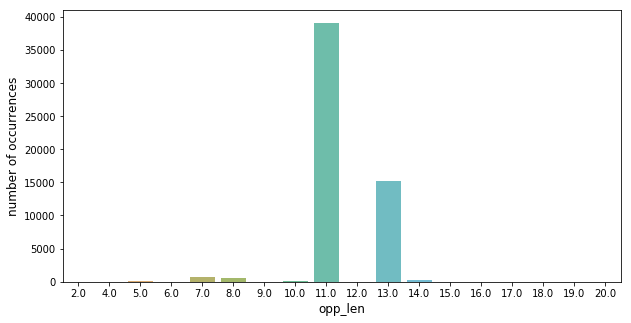

In [26]:
sms = train_df.merge(train_sms,on='uid',how='left').reset_index(drop=True)
test = pd.read_csv('sms_test_b.txt',sep='\t',header=None)
test.columns = ['uid','opp_num','opp_head','opp_len','start_time','in_out']
sms1 = sms[sms['label']==1]
bath = sms['opp_len'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("opp_len",fontsize=12)
# plt.xlim(0,25)
bath = sms1['opp_len'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("opp_len",fontsize=12)
# plt.xlim(0,100)
# plt.xlim(5,20)
# bath = test['opp_len'].value_counts()
# plt.figure(figsize=(10,5))
# sns.barplot(bath.index,bath.values,alpha=0.8)
# plt.ylabel("number of occurrences",fontsize = 12)
# plt.xlabel("opp_len",fontsize=12)
# plt.xlim(5,20)

(0, 40)

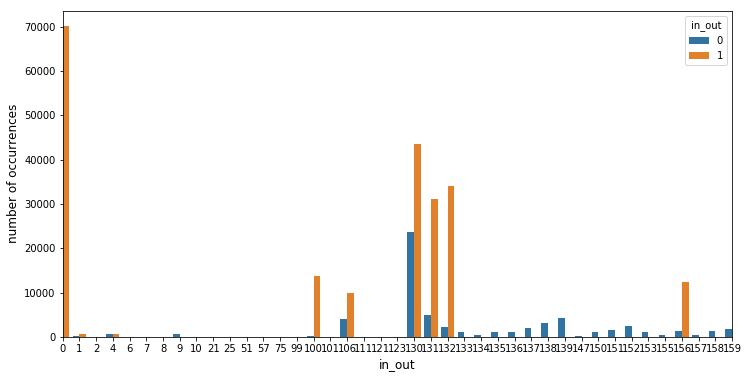

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='opp_head',hue='in_out',data=train_sms)
plt.ylabel('number of occurrences',fontsize=12)
plt.xlabel('in_out',fontsize=12)
plt.xlim(0,40)

(0, 20)

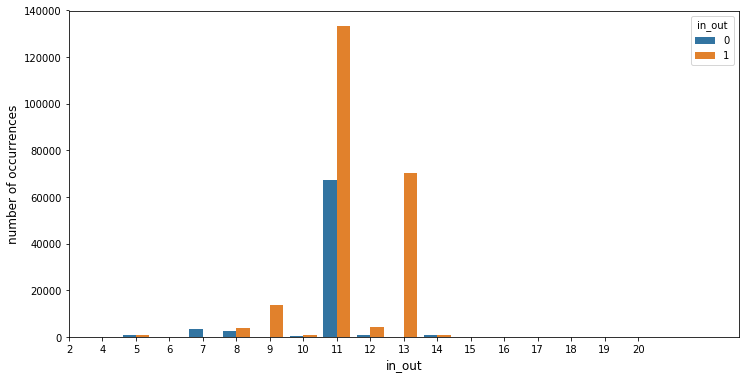

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='opp_len',hue='in_out',data=train_sms)
plt.ylabel('number of occurrences',fontsize=12)
plt.xlabel('in_out',fontsize=12)
plt.xlim(0,20)

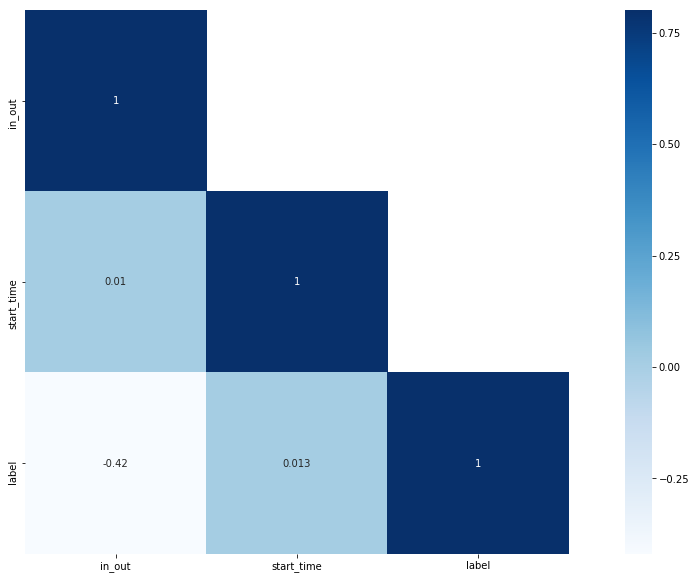

In [12]:
from matplotlib import cm
sms = train_df.merge(train_sms,on='uid',how='left').reset_index(drop=True)
corrMatt = sms[['in_out','start_time','label']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
cmap = cm.Blues
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,cmap=cmap,annot=True)

In [25]:
train_voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150778 entries, 0 to 1150777
Data columns (total 10 columns):
uid                    1150778 non-null object
opp_num                1150778 non-null object
opp_head               1150778 non-null int32
opp_len                1150778 non-null int64
start_time             1150778 non-null int64
end_time               1150778 non-null int64
call_type              1150778 non-null int64
in_out                 1150778 non-null int64
date                   1150778 non-null int32
voice_opp_head_mode    1150778 non-null int32
dtypes: int32(3), int64(5), object(2)
memory usage: 74.6+ MB


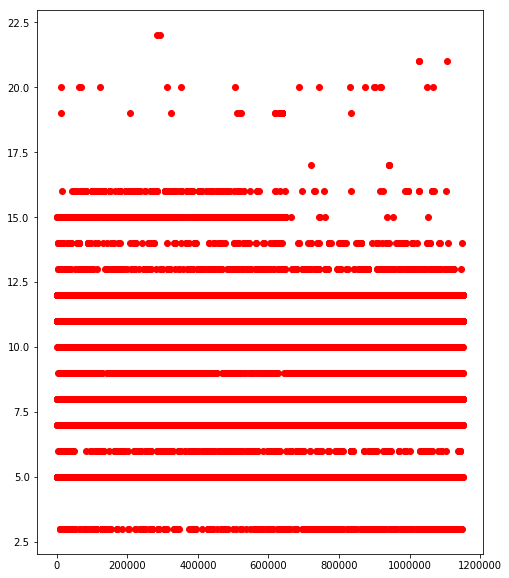

In [27]:
plt.figure(figsize=(8,10))
plt.scatter(range(train_voice.shape[0]),train_voice['opp_len'].values,color='red')

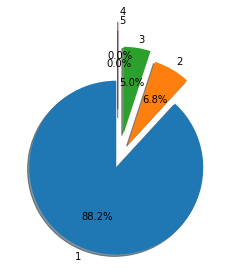

In [40]:
labels = ["1","2","3",'4','5']
sizes = train_voice['call_type'].value_counts().values
explode=[0.1,0.2,0.3,0.6,0.5]
plt.axes(aspect=1)
patches, texts, autotexts= plt.pie(sizes, labels=labels,
                                   explode=explode,autopct="%1.1f%%",
                                   shadow=True, 
                        labeldistance=1.1,startangle=90)
plt.show()

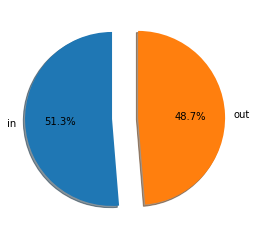

In [42]:
labels = ["in","out"]
sizes = train_voice['in_out'].value_counts().values
explode=[0.1,0.2]
plt.axes(aspect=1)
patches, texts, autotexts= plt.pie(sizes, labels=labels,
                                   explode=explode,autopct="%1.1f%%",
                                   shadow=True, 
                        labeldistance=1.1,startangle=90)
plt.show()

Text(0.5,0,'in_out')

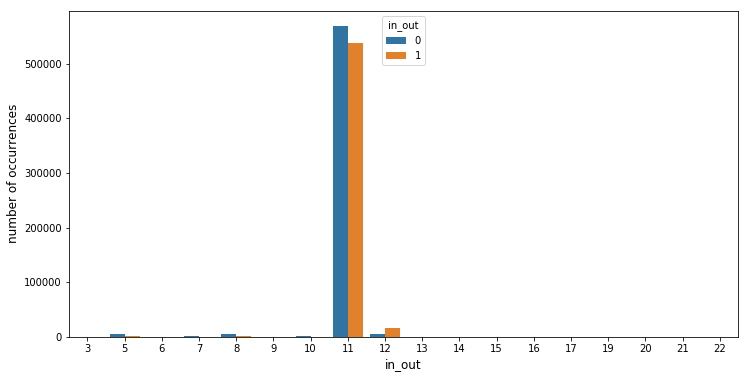

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='opp_len',hue='in_out',data=train_voice)
plt.ylabel('number of occurrences',fontsize=12)
plt.xlabel('in_out',fontsize=12)

(70, 100)

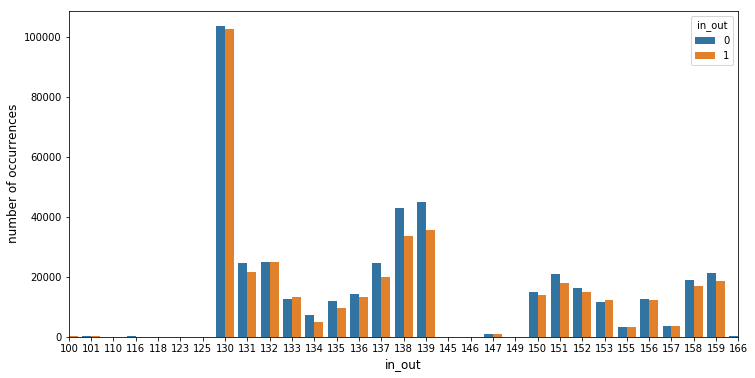

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x='opp_head',hue='in_out',data=train_voice)
plt.ylabel('number of occurrences',fontsize=12)
plt.xlabel('in_out',fontsize=12)
plt.xlim(70,100)

Text(0.5,0,'in_out')

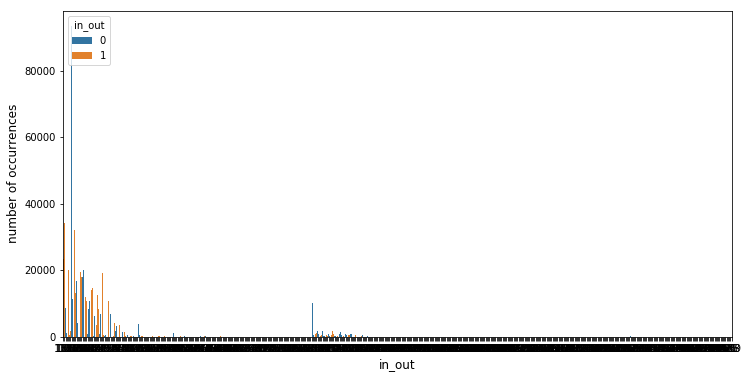

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='opp_head',hue='in_out',data=train_voice)
plt.ylabel('number of occurrences',fontsize=12)
plt.xlabel('in_out',fontsize=12)
# plt.xlim(100,200)

In [9]:
train_voice['date'] = train_voice['start_time']/1000000
train_voice['date'] = train_voice['date'].astype('int')
train_voice['date'].head(10)

0    26
1    26
2    26
3    26
4    26
5    26
6    26
7    26
8    26
9    26
Name: date, dtype: int32

Text(0.5,0,'date')

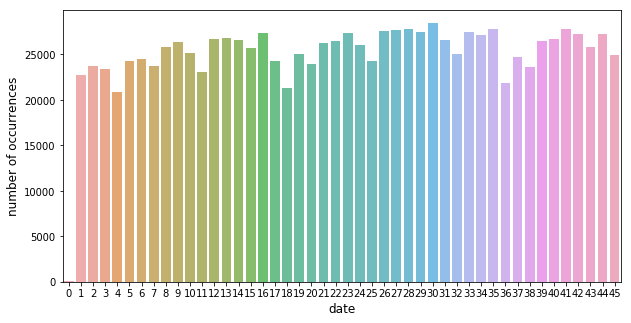

In [10]:
bath = train_voice['date'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("date",fontsize=12)

In [15]:
bath = train_voice['opp_head'].count()
plt.figure(figsize=(10,5))
sns.barplot(train_voice['date'],bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("date",fontsize=12)

AttributeError: 'numpy.int32' object has no attribute 'values'

Text(0.5,0,'date')

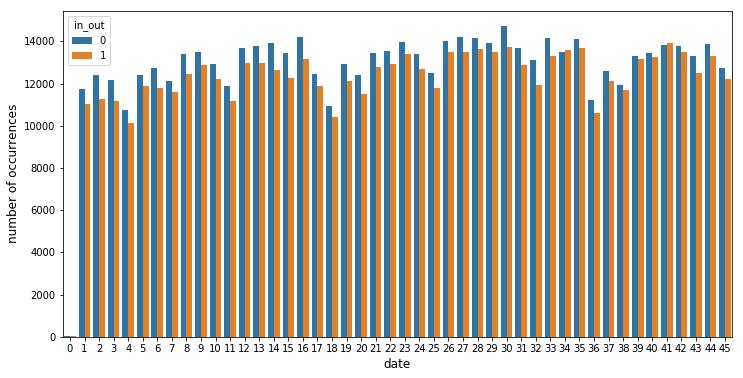

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x='date',hue='in_out',data=train_voice)
plt.ylabel('number of occurrences',fontsize=12)
plt.xlabel('date',fontsize=12)

Text(0.5,0,'in_out')

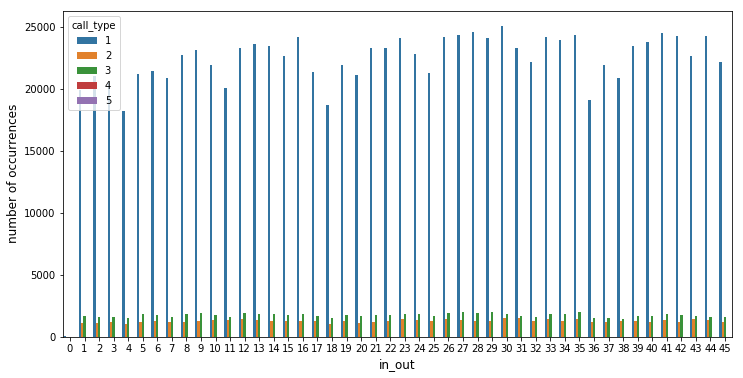

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x='date',hue='call_type',data=train_voice)
plt.ylabel('number of occurrences',fontsize=12)
plt.xlabel('in_out',fontsize=12)

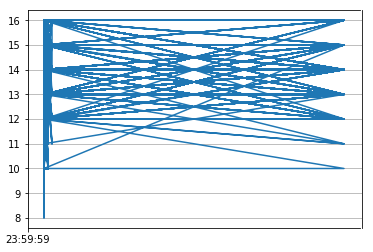

In [58]:
train_voice['start_time'] = pd.to_datetime(train_voice['start_time'])
train_voice['end_time'] = pd.to_datetime(train_voice['end_time'])
train_voice['voice_time'] = train_voice['end_time'] - train_voice['start_time']
train_voice['voice_time'] = pd.to_datetime(train_voice['voice_time'])
plt.plot(train_voice['voice_time'],train_voice['opp_num_unqiue'])
plt.grid(True)
plt.show()

Text(0.5,0,'opp_len')

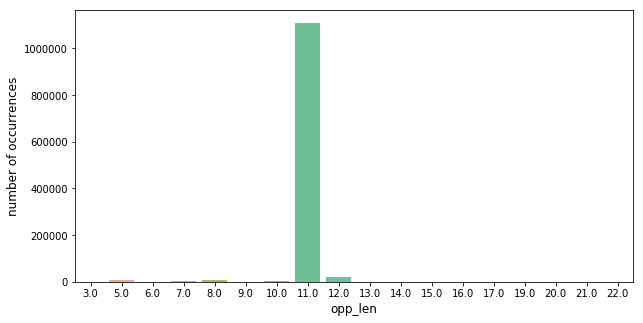

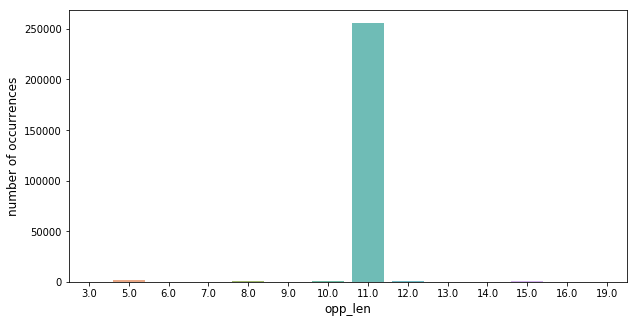

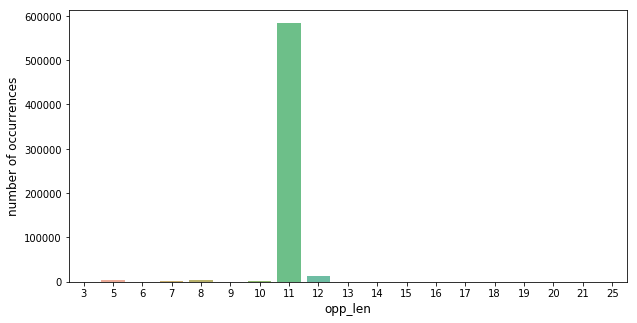

In [61]:
voice = train_df.merge(train_voice,on='uid',how='left').reset_index(drop=True)
test = pd.read_csv('voice_test_b.txt',sep='\t',header=None)
test.columns = ['uid','opp_num','opp_head','opp_len','start_time','end_time','call_type','in_out']
# sns.countplot(x='opp_head',hue='label',data=sms)
# tick_spacing = 50
# plt.ylabel('number of occurrences',fontsize=10)
# plt.xlabel('opp_head',fontsize=10)
# plt.show()
sms1 = voice[voice['label']==1]
bath = voice['opp_len'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("opp_len",fontsize=12)
# plt.xlim(0,20)
bath = sms1['opp_len'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("opp_len",fontsize=12)
# plt.xlim(0,20)
# plt.xlim(5,20)
bath = test['opp_len'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("opp_len",fontsize=12)
# plt.xlim(0,20)

Text(0.5,0,'opp_head')

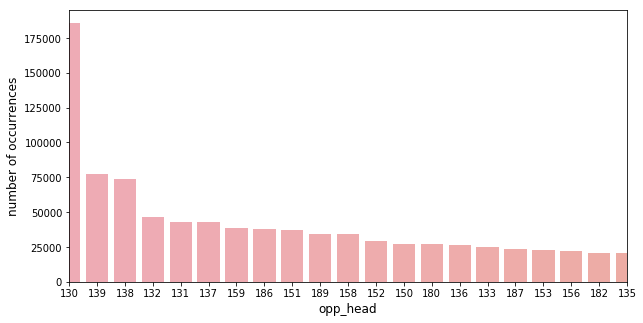

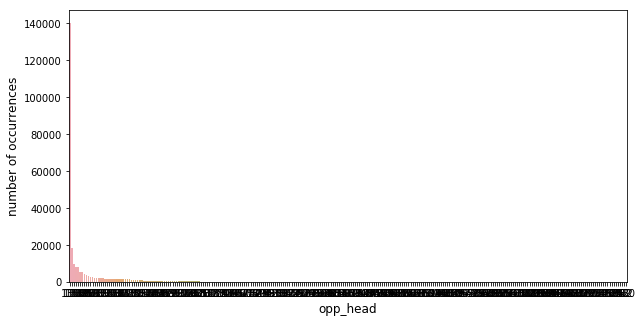

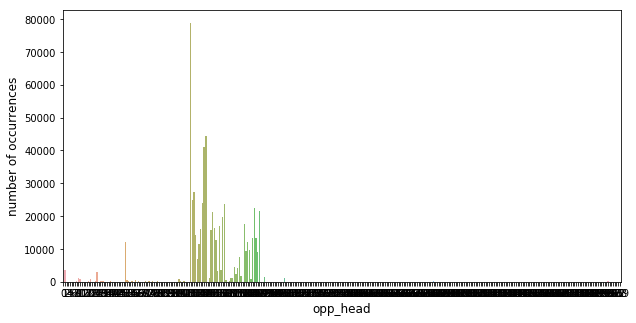

In [63]:
voice = train_df.merge(train_voice,on='uid',how='left').reset_index(drop=True)
test = pd.read_csv('voice_test_b.txt',sep='\t',header=None)
test.columns = ['uid','opp_num','opp_head','opp_len','start_time','end_time','call_type','in_out']
# sns.countplot(x='opp_head',hue='label',data=sms)
# tick_spacing = 50
# plt.ylabel('number of occurrences',fontsize=10)
# plt.xlabel('opp_head',fontsize=10)
# plt.show()
sms1 = voice[voice['label']==1]
bath = voice['opp_head'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("opp_head",fontsize=12)
plt.xlim(0,20)
bath = sms1['opp_head'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("opp_head",fontsize=12)
# plt.xlim(0,20)
# plt.xlim(5,20)
bath = test['opp_head'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(bath.index,bath.values,alpha=0.8)
plt.ylabel("number of occurrences",fontsize = 12)
plt.xlabel("opp_head",fontsize=12)
# plt.xlim(0,20)

In [7]:
train_wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808343 entries, 0 to 4808342
Data columns (total 8 columns):
uid           object
wa_name       object
visit_cnt     float64
visit_dura    float64
up_flow       float64
down_flow     float64
wa_type       float64
date          float64
dtypes: float64(6), object(2)
memory usage: 293.5+ MB


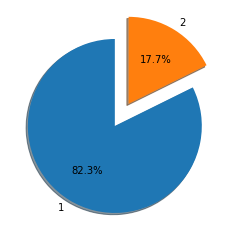

In [8]:
labels = ["1","2"]
sizes = train_wa['wa_type'].value_counts().values
explode=[0.1,0.2]
plt.axes(aspect=1)
patches, texts, autotexts= plt.pie(sizes, labels=labels,
                                   explode=explode,autopct="%1.1f%%",
                                   shadow=True, 
                        labeldistance=1.1,startangle=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

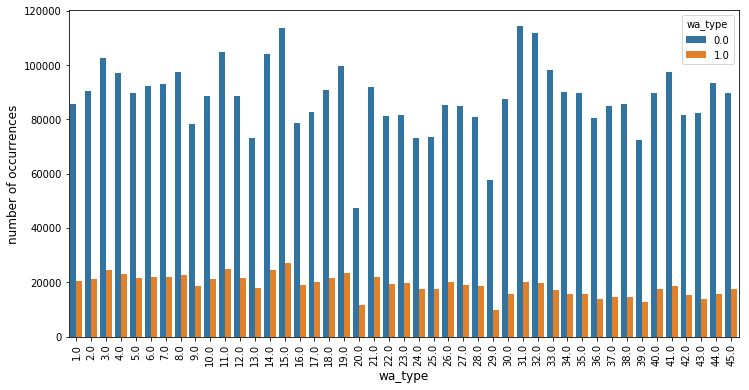

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x='date',hue='wa_type',data=train_wa)
plt.ylabel('number of occurrences',fontsize=12)
plt.xlabel('wa_type',fontsize=12)
plt.xticks(rotation=90)

(0, 20000)

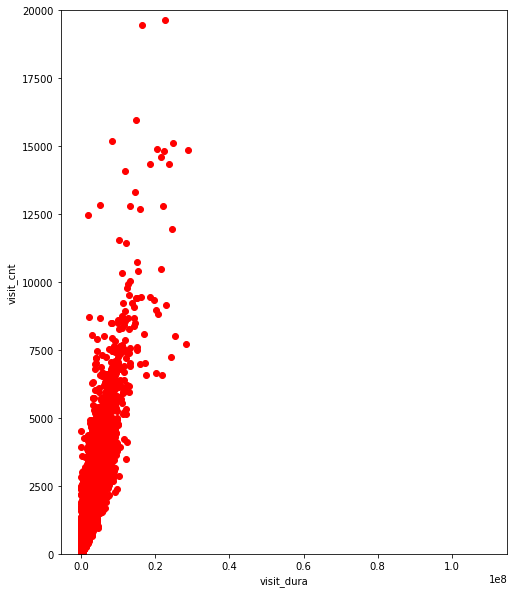

In [35]:
plt.figure(figsize=(8,10))
plt.scatter(train_wa['visit_dura'].values,train_wa['visit_cnt'].values,color='red')
plt.xlabel('visit_dura')
plt.ylabel('visit_cnt')
plt.ylim(0,20000)

In [34]:
train_wa['visit_dura'].head(10)

0      207.0
1      396.0
2     3212.0
3      723.0
4      990.0
5      105.0
6     7428.0
7    11419.0
8    10051.0
9    17542.0
Name: visit_dura, dtype: float64